In [1]:
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torchlensmaker as tlm

from xxchallenge import *

from torchlensmaker.elements.optical_surfaces import CollisionSurface
from torchlensmaker.core.physics import reflection

# Parameters
A = tlm.parameter(-0.10)

# Primary mirror
primary = tlm.Parabola(1800, A=A, normalize=True)

cylinder2 = tlm.ImplicitCylinder(torch.tensor(0.), torch.tensor(22.5), torch.tensor(150.))

# Optical model
optics = tlm.Sequential(
    tlm.Gap(-1000),
    #XXLightSource.load(),
    tlm.PointSourceAtInfinity(1200),
    tlm.Gap(998),
    tlm.ReflectiveSurface(primary),
    tlm.Gap(-800),
    NonImagingRod(cylinder2),
)

xxrender(optics, sampling={"xx": 500, "letter": "both", "base": 500}, end=200)

In [2]:
sampling = {"xx": 50, "disable_viewer": True, "letter": "both", "base": 50}

output = optics(tlm.default_input(sampling, dim=3, dtype=torch.float64))
print(output.loss)

tensor(9.5191, dtype=torch.float64, grad_fn=<AddBackward0>)


[  1/20] L= 9.51292 | grad norm= 181.00603550328563
[  2/20] L= 6.54579 | grad norm= 148.26360368569908
[  3/20] L= 4.54971 | grad norm= 121.87385943433748
[  4/20] L= 3.20317 | grad norm= 100.6097861674295
[  5/20] L= 2.28418 | grad norm= 83.33198172421702
[  6/20] L= 1.65415 | grad norm= 69.19137896878219
[  7/20] L= 1.22558 | grad norm= 57.63102721889894
[  8/20] L= 0.92516 | grad norm= 48.203258335850165
[  9/20] L= 0.71287 | grad norm= 41.37759642436091
[ 10/20] L= 0.55405 | grad norm= 36.25936499432118
[ 11/20] L= 0.43187 | grad norm= 31.849491950492958
[ 12/20] L= 0.33722 | grad norm= 28.04279046448607
[ 13/20] L= 0.26343 | grad norm= 24.855338625590534
[ 14/20] L= 0.20719 | grad norm= 22.029620850830586
[ 15/20] L= 0.16262 | grad norm= 19.46619187741401
[ 16/20] L= 0.12775 | grad norm= 17.211110278211134
[ 17/20] L= 0.10048 | grad norm= 15.229779898153037
[ 18/20] L= 0.07910 | grad norm= 13.485023927323418
[ 19/20] L= 0.06223 | grad norm= 11.926141639893226
[ 20/20] L= 0.04915 

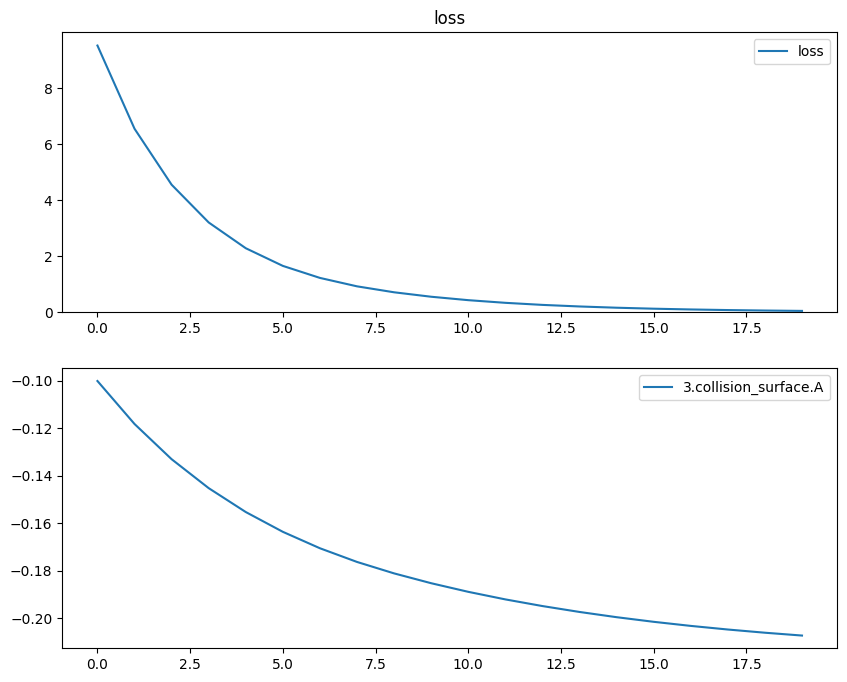

Best loss 0.04914850741624832 at iteration 20 / 20
    3.collision_surface.A tensor(-0.2072, dtype=torch.float64)

Best loss 0.04914850741624832 at iteration 20 / 20
Set 3.collision_surface.A to -0.20721873561495507
A Parameter containing:
tensor(-0.2072, dtype=torch.float64, requires_grad=True)
F -1085.8091539468


In [4]:
param_groups = [
    {'params': [A], 'lr': 1e-4},
]

record = tlm.optimize(
    optics,
    optimizer = optim.SGD(param_groups),
    sampling = {"xx": 50, "disable_viewer": True, "letter": "both", "base": 50},
    dim = 3,
    num_iter = 20
)


plot_record(record, param_groups, optics)
record.best()

settobest(optics, record, param_groups)

print("A", A)
F = 1./(primary._sag.unnorm(primary.diameter / 2) * 4)
print("F", F.item())

xxrender(optics, sampling={"xx": 50, "letter": "both", "base": 50})